# Plotting heuristics of Machine Learning pipeline

**Author**: Miguel Xochicale [@mxochicale](https://github.com/mxochicale)     
**Contributors**: Nhat Phung Tran Huy [@huynhatd13](https://github.com/huynhatd13); Hamideh Kerdegari [@hamidehkerdegari](https://github.com/hamidehkerdegari);  Alberto Gomez [@gomezalberto](https://github.com/)  


## History
* June2022: Adding multiple plots  
* Aug2022: Ploting multiple trians

## Summary
This notebook presents a learning pipeline to classify 4 chamber view from echocardiography datasets.

### How to run the notebook

1. Go to echocardiography repository path: `$HOME/repositories/echocardiography/`
2. Open echocardiography repo in pycharm and in the terminal type:
    ```
    git checkout master # or the branch
    git pull # to bring a local branch up-to-date with its remote version
    ```
3. Launch Notebook server  
    Go to you repository path: `cd $HOME/repositories/echocardiography/scripts/dataloaders` and type in the pycharm terminal:
    ```
    conda activate rt-ai-echo-VE 
    jupyter notebook
    ```
    which will open your web-browser.
    
    
### References
* "Proposed Regulatory Framework for Modifications to Artificial Intelligence/Machine Learning (AI/ML)-Based Software as a Medical Device (SaMD) - Discussion Paper and Request for Feedback". https://www.fda.gov/media/122535/download 




# Jupyter Notebook

## 1. Setting imports and datasets paths

In [1]:
import os
import fnmatch
import sys
import argparse
import yaml
from pathlib import Path
import json    

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

import numpy as np
import pandas as pd
import seaborn as sns

from typing import Dict, List, Tuple

from source.helpers.learning_pipeline import json2DataFrame, \
                                            jsonPARAMS2DataFrame


HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]

REPOSITORY_PATH='repositories/echocardiography'
FULL_REPO_PATH = HOME_PATH+'/'+REPOSITORY_PATH

#### Setting RESULTS_PATH and TRAINING_CURVES_PATH
# RESULTS_PATH='scripts/learning-pipeline/results/1st-tests-23-june-2022'
#RESULTS_PATH='scripts/learning-pipeline/results/3rd-tests-30-june-2022/experiments-01-02-03-04'
#RESULTS_PATH='scripts/learning-pipeline/results/3rd-tests-30-june-2022/experiments-04-05-06-07'
#RESULTS_PATH='scripts/learning-pipeline/results/3rd-tests-30-june-2022/experiments-09-10-11-12'

#######################################
##MobileNet2() with 2,225,858 params
# NUMBER_OF_SUBJECTS='05-subjects'
# # NUMBER_OF_SUBJECTS='31-subjects'
# RESULTS_PATH='scripts/learning-pipeline/results/5th-tests-04-augs-2022/'+NUMBER_OF_SUBJECTS


####################################
##SqueezeNet_source0() with 733,580 params
# NUMBER_OF_SUBJECTS='05-subjects'
NUMBER_OF_SUBJECTS='31-subjects'
RESULTS_PATH='scripts/learning-pipeline/results/6th-tests-05-aug-2022/'+NUMBER_OF_SUBJECTS



TRAINING_CURVES_PATH = os.path.join(FULL_REPO_PATH, RESULTS_PATH)
## Printing Versions and paths
print(f'Pandas Version: {pd.__version__}')
print(f'seaborn Version: {sns.__version__}')
print(f'TRAINING_CURVES_PATH: {TRAINING_CURVES_PATH}' )

Pandas Version: 1.4.2
seaborn Version: 0.11.1
TRAINING_CURVES_PATH: /home/mx19/repositories/echocardiography/scripts/learning-pipeline/results/6th-tests-05-aug-2022/31-subjects


## 2. Reading dictionaries and filtering files

In [2]:
print(f'TRAINING_CURVES_PATH: {TRAINING_CURVES_PATH}' )
os.chdir(TRAINING_CURVES_PATH)

pattern = 'TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC*.json'
json_files=fnmatch.filter(  sorted(os.listdir(TRAINING_CURVES_PATH))  , pattern)
print(f'-------------------')
print(f'-----Stats')
for i in range(0,len(json_files)):
    print(i, json_files[i])
    
    
pattern_params = 'TEMP_DICT_TRAINING_CURVES_FOR____TRAINING_PARAMETERS*.json'
json_files_params=fnmatch.filter(  sorted(os.listdir(TRAINING_CURVES_PATH))  , pattern_params)    
print(f'-------------------')
print(f'----Parameters')
for i in range(0,len(json_files_params)):
    print(i, json_files_params[i])    



TRAINING_CURVES_PATH: /home/mx19/repositories/echocardiography/scripts/learning-pipeline/results/6th-tests-05-aug-2022/31-subjects
-------------------
-----Stats
0 TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC_TRAINset_clips_208TESTset_clips_46VALset_clips48___EPOCHS_500_BATCH_SIZE_OF_CLIPS_20_NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_1_LEARNING_RATE_0_0010000000_TRAINVERSION_train02.json
1 TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC_TRAINset_clips_210TESTset_clips_38VALset_clips54___EPOCHS_500_BATCH_SIZE_OF_CLIPS_20_NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_1_LEARNING_RATE_0_0010000000_TRAINVERSION_train01.json
2 TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC_TRAINset_clips_210TESTset_clips_46VALset_clips46___EPOCHS_500_BATCH_SIZE_OF_CLIPS_20_NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_1_LEARNING_RATE_0_0010000000_TRAINVERSION_train00.json
-------------------
----Parameters
0 TEMP_DICT_TRAINING_CURVES_FOR____TRAINING_PARAMETERSTRAINset_clips_208TESTset_clips_46VALset_clips48___EPOCHS_500_BATCH_SIZE_OF_C

## 2. Plotting training curves

     epochs      LR N_BatchClips FRXClips datatype    Acc [%] RUN_NN
0         0  lr0.01         bc20        1    train  48.636364  run02
1         1  lr0.01         bc20        1    train  44.818182  run02
2         2  lr0.01         bc20        1    train  45.272727  run02
3         3  lr0.01         bc20        1    train  47.727273  run02
4         4  lr0.01         bc20        1    train  48.181818  run02
..      ...     ...          ...      ...      ...        ...    ...
995     495  lr0.01         bc20        1     test  78.260870  run00
996     496  lr0.01         bc20        1     test  80.434783  run00
997     497  lr0.01         bc20        1     test  71.739130  run00
998     498  lr0.01         bc20        1     test  73.913043  run00
999     499  lr0.01         bc20        1     test  71.739130  run00

[3000 rows x 7 columns]


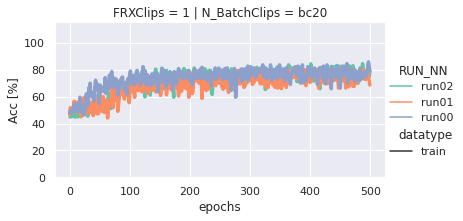

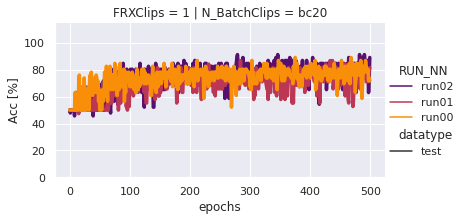

     epochs      LR N_BatchClips FRXClips datatype      Loss RUN_NN
0         0  lr0.01         bc20        1    train  0.779129  run02
1         1  lr0.01         bc20        1    train  0.813828  run02
2         2  lr0.01         bc20        1    train  0.824420  run02
3         3  lr0.01         bc20        1    train  0.746523  run02
4         4  lr0.01         bc20        1    train  0.725001  run02
..      ...     ...          ...      ...      ...       ...    ...
995     495  lr0.01         bc20        1     test  0.509389  run00
996     496  lr0.01         bc20        1     test  0.430281  run00
997     497  lr0.01         bc20        1     test  0.622316  run00
998     498  lr0.01         bc20        1     test  0.478040  run00
999     499  lr0.01         bc20        1     test  0.570159  run00

[3000 rows x 7 columns]


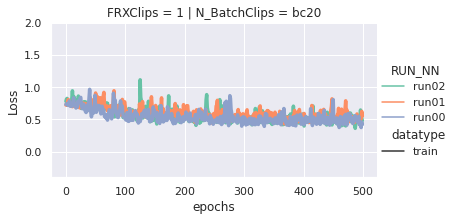

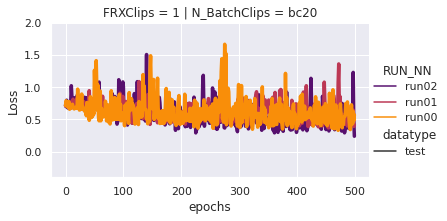

In [3]:
TYPE_str = 'ACC'    
FRAMES_PER_SEGMENT_IN_A_CLIP = 1
BatchClips=20
LR=0.01
STR_VARIABLE_NAME = 'Acc [%]'
# RUN_VERSION=['run02', 'run00', 'run01']
RUN_VERSION=['run02', 'run01', 'run00']

acc0_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[0]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[0])
acc1_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[1]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[1])
acc2_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[2]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[2])


acc_dfall = [acc0_all_, acc1_all_,acc2_all_]
acc_all = pd.concat(acc_dfall)
print(acc_all)


sns.set(style="darkgrid")#sns.set(style="ticks")
g0=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="Set2",#palette=palette,
            data=acc_all.query("datatype == 'train'"))#data=acc_all)
g0.set(ylim=(0, 115))

sns.set(style="darkgrid")
g1=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="inferno",#palette=palette,
            data=acc_all.query("datatype == 'test'"))#data=acc_all)
g1.set(ylim=(0, 115))

plt.show()


TYPE_str = 'LOS'    
BatchClips=20
STR_VARIABLE_NAME = 'Loss'
loss0_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[0]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[0])
loss1_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[1]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[1])
loss2_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[2]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[2])

loss_dfall = [loss0_all_, loss1_all_,loss2_all_]
loss_all = pd.concat(loss_dfall)
print(loss_all)


sns.set(style="darkgrid")#sns.set(style="ticks")
g2=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="Set2",#palette=palette,
            data=loss_all.query("datatype == 'train'"))#data=acc_all)
g2.set(ylim=(-0.4, 2))

sns.set(style="darkgrid")
g3=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="inferno",#palette=palette,
            data=loss_all.query("datatype == 'test'"))#data=acc_all)
g3.set(ylim=(-0.4, 2))

plt.show()
    

## 3. Plotting Paramters of Performance

elapsed_time_for_the_NOTEBOOK_in_secs [724.7563352584839, 737.1558244228363, 756.7095589637756]
elapsed_time_for_the_training_loop_in_secs [443.5657284259796, 450.4305748939514, 464.72138142585754]
Precision [0.7517482517482511, 0.7625000000000001, 0.7738095238095241]
Recall [0.75, 0.7592592592592591, 0.760869565217391]
F1score [0.7495652173913041, 0.7585139318885441, 0.7580105212816831]
       Dataset Classification type  Classification [%] RUN_NN
0  31-subjects           Precision            0.751748  run02
1  31-subjects           Precision            0.762500  run01
2  31-subjects           Precision            0.773810  run00
0  31-subjects              Recall            0.750000  run02
1  31-subjects              Recall            0.759259  run01
2  31-subjects              Recall            0.760870  run00
0  31-subjects             F1score            0.749565  run02
1  31-subjects             F1score            0.758514  run01
2  31-subjects             F1score            0.758

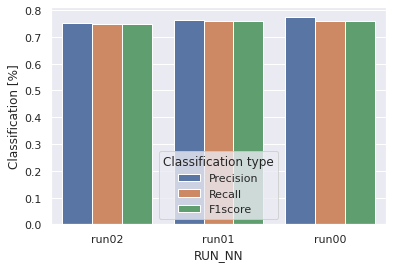

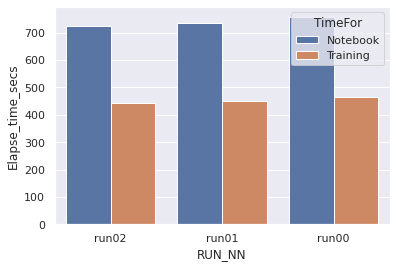

In [4]:
elapsed_time_for_the_NOTEBOOK_in_secs=[]
elapsed_time_for_the_training_loop_in_secs=[]
Precision=[]
Recall=[]
F1score=[]


for i in range(0, len(json_files_params)):
    params=jsonPARAMS2DataFrame(TRAINING_CURVES_PATH,str(json_files_params[i]))
    elapsed_time_for_the_NOTEBOOK_in_secs.append(params[0])
    elapsed_time_for_the_training_loop_in_secs.append(params[1])
    Precision.append(params[11]['Precision']['weighted avg/Total'])
    Recall.append(params[11]['Recall']['weighted avg/Total'])
    F1score.append(params[11]['F1-score']['weighted avg/Total'])
    
print(f'elapsed_time_for_the_NOTEBOOK_in_secs {elapsed_time_for_the_NOTEBOOK_in_secs}')    
print(f'elapsed_time_for_the_training_loop_in_secs {elapsed_time_for_the_training_loop_in_secs}')
print(f'Precision {Precision}')   
print(f'Recall {Recall}')   
print(f'F1score {F1score}')






##
Y_AXIS_LABEL='Classification [%]'
precision_report_df = pd.DataFrame(Precision).reset_index(drop=True)
precision_report_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
precision_report_df.insert(0, 'Classification type', 'Precision', True)
precision_report_df['RUN_NN'] = RUN_VERSION
precision_report_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)

recall_report_df = pd.DataFrame(Recall).reset_index(drop=True)
recall_report_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
recall_report_df.insert(0, 'Classification type', 'Recall', True)
recall_report_df['RUN_NN'] = RUN_VERSION
recall_report_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)


f1score_report_df = pd.DataFrame(F1score).reset_index(drop=True)
f1score_report_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
f1score_report_df.insert(0, 'Classification type', 'F1score', True)
f1score_report_df['RUN_NN'] = RUN_VERSION
f1score_report_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)

classification_df = pd.concat([precision_report_df, recall_report_df, f1score_report_df])
print(classification_df)
sns.barplot(x="RUN_NN", y=Y_AXIS_LABEL, hue="Classification type", 
                 data=classification_df)
plt.show()

Y_AXIS_LABEL='Elapse_time_secs'
timenotebook_df = pd.DataFrame(elapsed_time_for_the_NOTEBOOK_in_secs).reset_index(drop=True)
timenotebook_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
timenotebook_df['RUN_NN'] = RUN_VERSION
timenotebook_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)
timenotebook_df.insert(3, 'TimeFor', 'Notebook', True)

timetraining_df = pd.DataFrame(elapsed_time_for_the_training_loop_in_secs).reset_index(drop=True)
timetraining_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
timetraining_df['RUN_NN'] = RUN_VERSION
timetraining_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)
timetraining_df.insert(3, 'TimeFor', 'Training', True)

df_all = pd.concat([timenotebook_df, timetraining_df])

sns.barplot(x="RUN_NN", y=Y_AXIS_LABEL, hue="TimeFor", 
                 data=df_all)
plt.show()



##https://seaborn.pydata.org/generated/seaborn.barplot.html